In [7]:
# Let's import our libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [3]:
#house = pd.read_excel('/home/utkarsh/LearnBay/ML_Python/Maison.xlsx') ## Reading the data
house = pd.read_csv("data/Maison.csv")

In [4]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [5]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

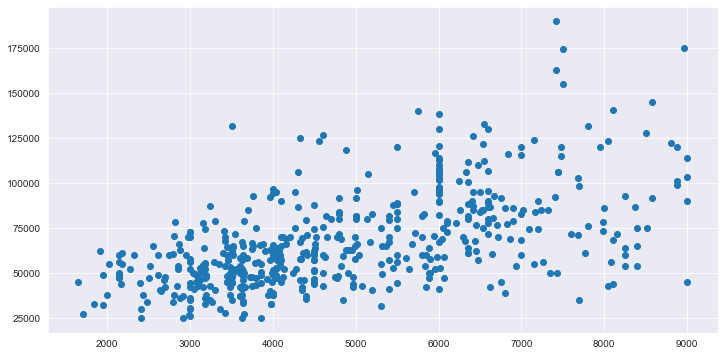

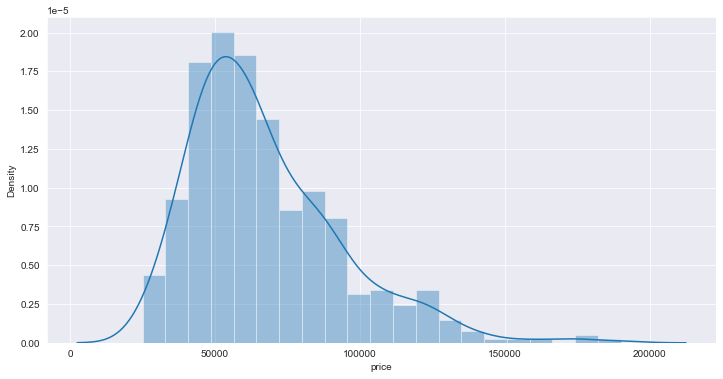

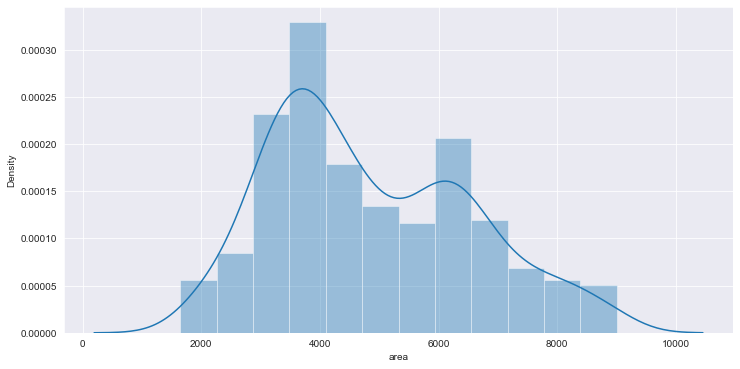

In [43]:
# Let's see ig we have a linear relation between price and area
#sns.palettes(house['area'], house['price'], palette = 'viridis')
plt.scatter(house['area'], house['price'])
plt.show()
sns.distplot(house['price'])
plt.show()
sns.distplot(house['area'])
plt.show()

#### Removing the out liers

In [39]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1  # Consedering 1.5 for 3mu which is 99% ,Consider 1 for only 2 mu which is 95 %
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 0)
    
    return multiple_outliers

In [40]:
# removing the out liers
print(house.shape)
house = house.drop(detect_outliers(house,["area"]),axis=0).reset_index(drop = True) # "price",
print(house.shape)

(546, 12)
(521, 12)


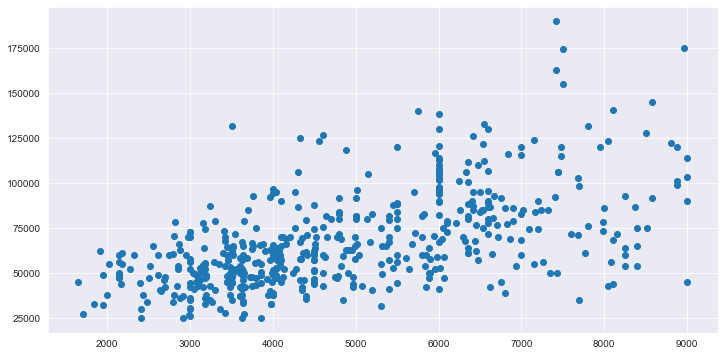

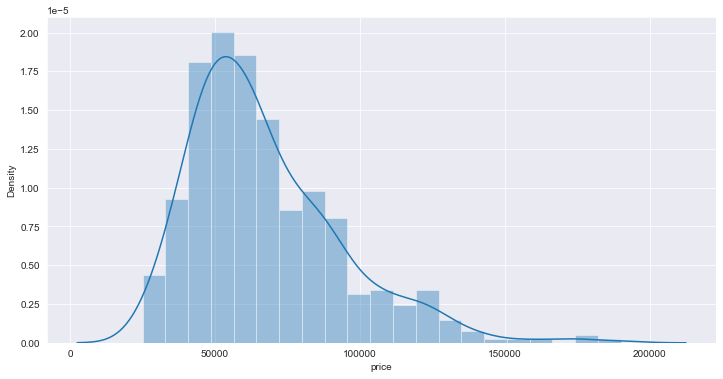

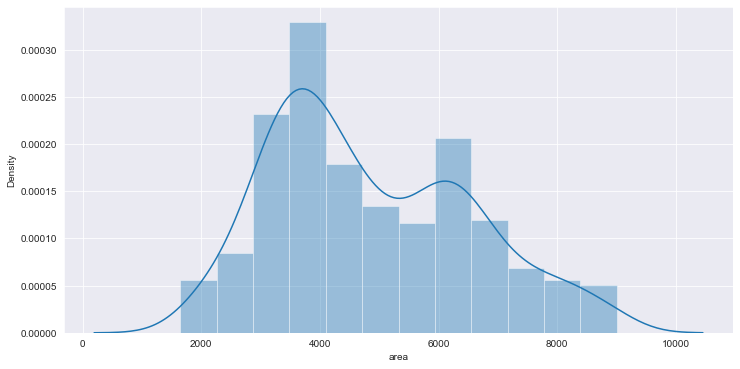

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,67234.725528,4855.631478,2.961612,1.284069,1.821497,0.852207,0.180422,0.347409,0.046065,0.320537,0.664107,0.220729
std,26268.720353,1694.899662,0.735412,0.499919,0.877496,0.355235,0.384908,0.476605,0.209828,0.467132,0.852845,0.415137
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48900.000000,3520.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61000.000000,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6040.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,9000.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [41]:
# after removing the out liers how does this look like
plt.scatter(house['area'], house['price'])
plt.show()
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])
plt.show()
sns.distplot(house['area'])
plt.show()
house.describe()

### Linear Regression

In [25]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [44]:
# We now instatiate a Linear Regression object
lm = LinearRegression()

In [45]:
# let's do the split of the dataset
house.columns
X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house['price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [47]:
## Let's chec the head of some of these splits
X_test.head()
# We see that they are randomly selected

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
359,6420,3,1,1,1,0,1,0,1,0,1
243,2910,2,1,1,0,0,0,0,0,0,0
213,3630,2,1,1,1,0,0,0,0,0,0
64,5500,3,1,2,1,0,0,0,1,0,0
100,3300,3,3,2,1,0,1,0,0,0,0


In [48]:
# Now let's build the model using sklearn
lm.fit(X_test,y_test)

LinearRegression()

In [49]:
# Now let's look at the coefficients
print(lm.coef_)
# it would be nicer if we can put them together in a dataframe

[4.54714896e+00 3.46680568e+03 1.19144505e+04 4.40158124e+03
 8.68816845e+03 6.74274507e+03 3.99736150e+03 2.10885914e+03
 1.30165692e+04 1.47245302e+03 8.07595073e+03]


In [50]:
coef = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
coef

,Coefficients
area,4.547149
rooms,3466.805679
bathroom,11914.450489
floors,4401.581245
driveway,8688.168446
game_room,6742.745071
cellar,3997.361503
gas,2108.859139
air,13016.569202
garage,1472.453017


In [51]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean/ R square: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [52]:
get_cv_scores(lm)

CV Mean/ R square:  0.6706170247035222
STD:  0.05368765487701748




## Ridge 

In [53]:
from sklearn.linear_model import Ridge

In [54]:
ridge =  Ridge()
# Melwin Remember alpha is nothing but the lamda itself in the Resedual sum of Square
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
ridge_regression = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, cv=5, n_jobs=-1)
grid_result = ridge_regression.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6742883926075313
Best Params:  {'alpha': 10}


### Lasso 

In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso(); 
# find optimal alpha with grid search
# Melwin Remember alpha is nothing but the lamda itself in the Resedual sum of Square
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
lasso_regression = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, cv=5, n_jobs=-1)
grid_result = lasso_regression.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6710174687192071
Best Params:  {'alpha': 100}


In [56]:
prediction_lasso=lasso_regression.predict(X_test)
prediction_ridge=ridge_regression.predict(X_test)

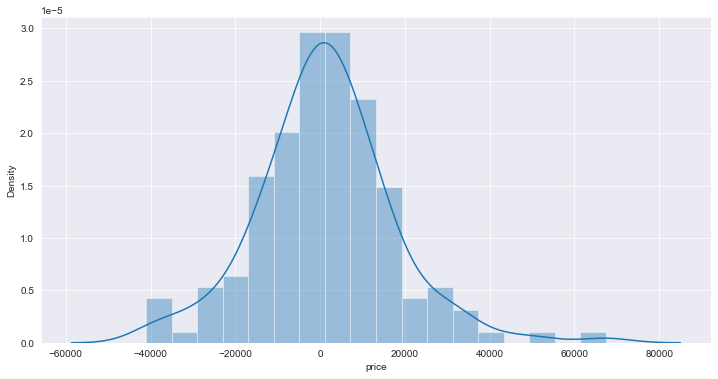

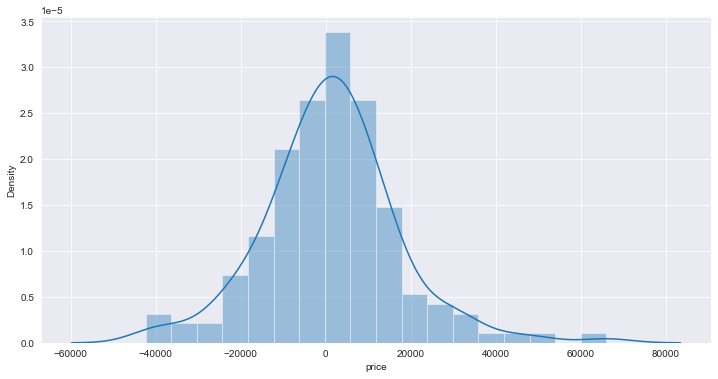

In [59]:
sns.distplot(y_test-prediction_lasso)
plt.show()
sns.distplot(y_test-prediction_ridge)
plt.show()

In [36]:
## by Looking at the graph we understand Lasso is giving much smoother graph 
## we can go ahead with Lasso